In [1]:
# 1.0 Call libraries
from sklearn.cluster import KMeans
# 1.1 For creating elliptical-shaped clusters
from sklearn.datasets import make_blobs
# 1.2 Data manipulation
import pandas as pd
import numpy as np
# 1.3 Plotting
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns
# 1.4 TSNE
from sklearn.manifold import TSNE
import os
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib
from sklearn.preprocessing import StandardScaler
%matplotlib inline


In [2]:
# Display output of command in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# Go to folder containing data file
#os.chdir("E:\\IDA_Training\\Assignments\\GMM")
#os.listdir()            # List all files in the folder

#df = pd.read_csv("datasets_42674_74935_Mall_Customers.csv")
os.chdir("/kaggle/input/customer-segmentation-tutorial-in-python")
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape               
df.dtypes

(200, 5)

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [5]:
df.columns = df.columns.str.replace("k", "")
df.columns = df.columns.str.replace("$", "")
df.columns = df.columns.str.replace("1", "")
df.columns = df.columns.str.replace("0", "")
df.columns = df.columns.str.replace("-", "")
df.columns = df.columns.str.replace("(", "")
df.columns = df.columns.str.replace(")", "")
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(" ", "_")
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df['Gender'] = df['Gender'].map({
                                    'Male' : 1,
                                    'Female' : 0
                               })
df.drop(['CustomerID'], axis=1,inplace = True)

In [7]:
df.head()

,Gender,Age,Annual_Income,Spending_Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


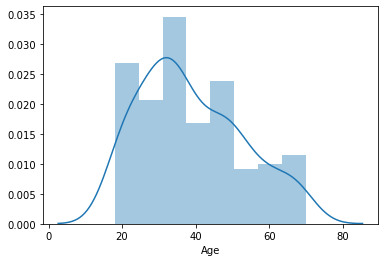

In [8]:
sns.distplot(df.Age)

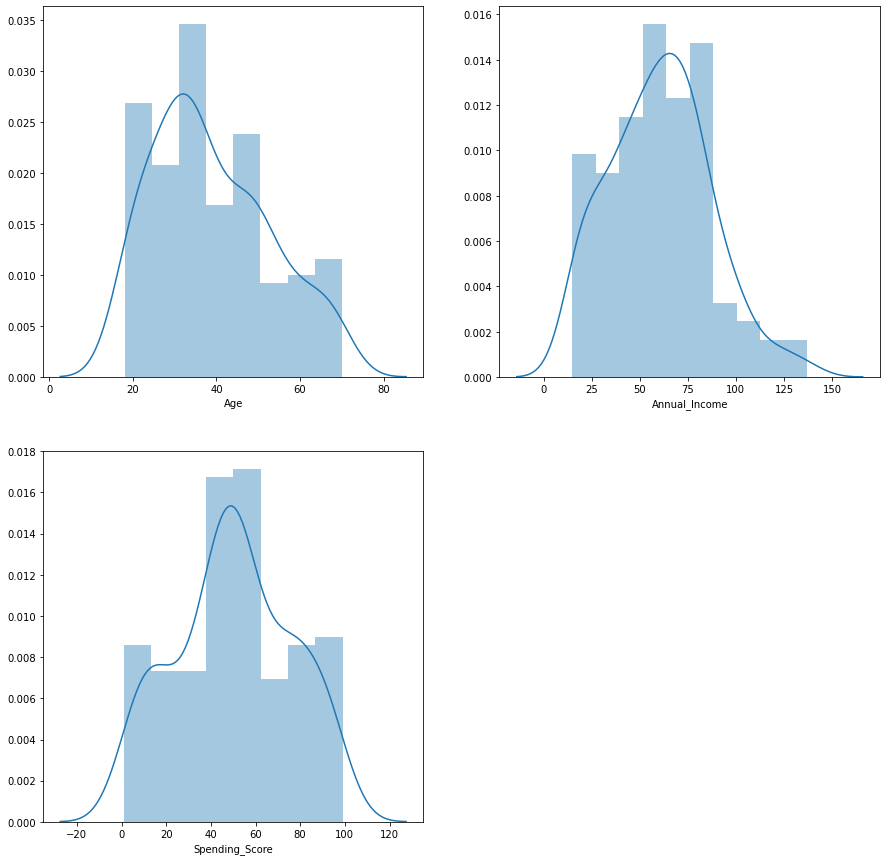

In [9]:
columns = ['Age', 'Annual_Income', 'Spending_Score']
fig = plt.figure(figsize = (15,15))
for i in range(len(columns)):
    plt.subplot(2,2,i+1)
    sns.distplot(df[columns[i]])

[('Age', 'Gender'), ('Annual_Income', 'Gender'), ('Spending_Score', 'Gender')]

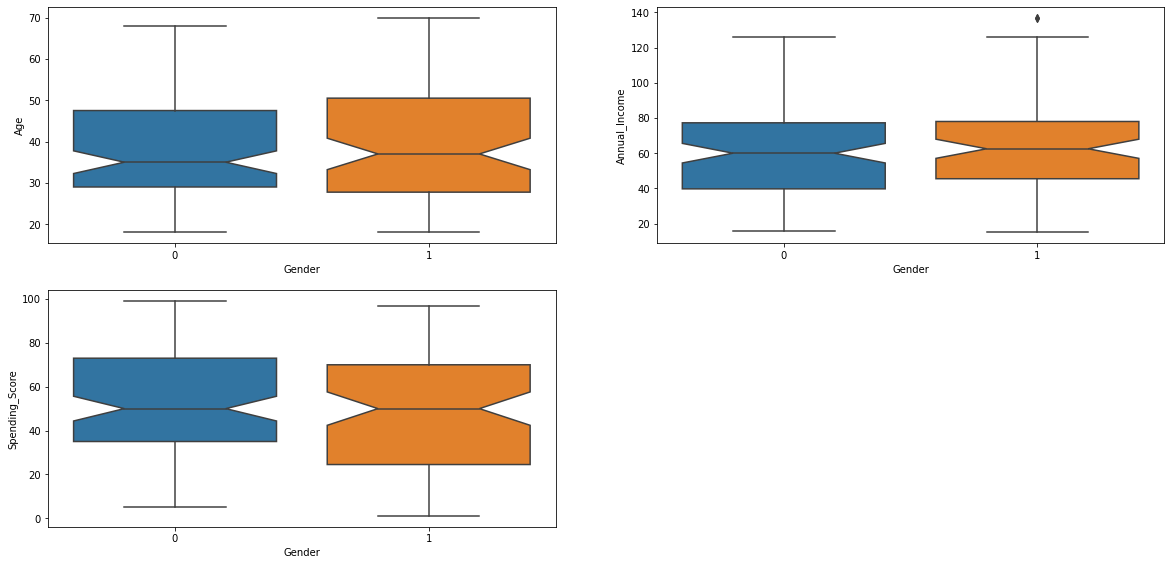

In [10]:
columns = ['Age', 'Annual_Income', 'Spending_Score']
catVar = ['Gender' ]


# 6.3 Now for loop. First create pairs of cont and cat variables
mylist = [(cont,cat)  for cont in columns  for cat in catVar]
mylist

# 6.4 Now run-through for-loop
fig = plt.figure(figsize = (20,20))
for i, k in enumerate(mylist):
    #print(i, k[0], k[1])
    plt.subplot(4,2,i+1)
    sns.boxplot(x = k[1], y = k[0], data = df,notch = True)

Text(0.5, 0, 'Age')

Text(0.5, 0, 'Annual_Income')

Text(0.5, 0, 'Spending_Score')

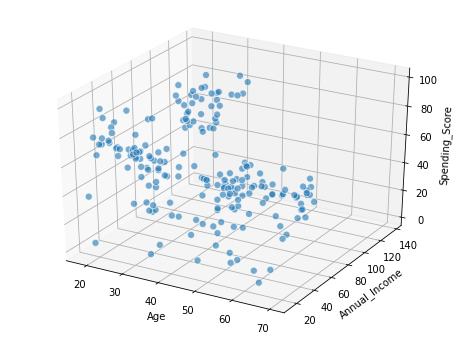

In [11]:
from mpl_toolkits.mplot3d import Axes3D
#columns = ['Age', 'Annual_Income', 'Spending_Score']
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = df['Age']
ys = df['Annual_Income']
zs = df['Spending_Score']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('Age')
ax.set_ylabel('Annual_Income')
ax.set_zlabel('Spending_Score')

In [12]:

from sklearn import preprocessing
from sklearn.decomposition import PCA

ss = StandardScaler()     # Create an instance of class
ss.fit(df)                # Train object on the data
X = ss.transform(df)      # Transform data
X[:2, :]
normalized_df = preprocessing.normalize(X)
normalized_df = pd.DataFrame(normalized_df)
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
X_principal.head(2)

StandardScaler()

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407]])

,P1,P2
0,0.224007,0.409408
1,0.093617,0.680596


In [13]:
from sklearn.mixture import GaussianMixture

#gmm = GaussianMixture(n_components = 3) 
#gmm.fit(X_principal)

# 4.1 Perform clsutering
gm = GaussianMixture(
                     n_components = 3,
                     n_init = 10,
                     max_iter = 100)

# 4.2 Train the algorithm
gm.fit(X_principal)

# 4.3 Where are the clsuter centers
gm.means_

# 4.4 Did algorithm converge?
gm.converged_

# 4.5 How many iterations did it perform?
gm.n_iter_

gm.predict(X_principal)

GaussianMixture(n_components=3, n_init=10)

array([[-0.65938256,  0.29113371],
       [-0.24439256, -0.64530001],
       [ 0.57226254,  0.23187314]])

True

3

array([2, 2, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 2, 2, 1, 2, 2, 0, 2, 2,
       1, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 0, 1, 0, 1, 0, 1, 2, 2, 0,
       1, 0, 1, 0, 0, 0, 1, 2, 0, 2, 1, 2, 1, 2, 0, 2, 2, 2, 1, 1, 2, 2,
       1, 1, 2, 0, 2, 1, 1, 1, 2, 2, 1, 2, 0, 1, 2, 2, 2, 1, 0, 2, 1, 0,
       0, 1, 1, 2, 2, 1, 0, 2, 1, 0, 2, 2, 0, 1, 2, 2, 2, 0, 1, 2, 2, 2,
       2, 0, 1, 2, 0, 0, 1, 1, 1, 1, 2, 1, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2,
       0, 0, 2, 0, 1, 2, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 1, 2, 2, 2, 1, 0,
       1, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 1, 2, 2, 2, 2, 2, 1, 0,
       2, 2, 2, 2, 1, 0, 2, 0, 1, 2, 1, 2, 1, 0, 1, 0, 2, 0, 1, 0, 1, 2,
       2, 2])

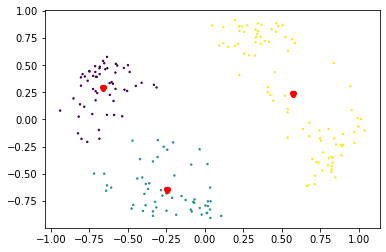

In [14]:
plt.scatter(X_principal['P1'], X_principal['P2'], 
            c=gm.predict(X_principal),
            s=2)
plt.scatter(gm.means_[:, 0], gm.means_[:, 1],
            marker='v',
            s=5,               # marker size
            linewidths=5,      # linewidth of marker edges
            color='red'
            )
            
#           c = GaussianMixture(n_components = 3).fit_predict(X_principal), cmap =plt.cm.winter, alpha = 0.6) 
plt.show()

In [15]:
densities = gm.score_samples(X_principal)
#densities

density_threshold = np.percentile(densities,5)
density_threshold

anomalies = X_principal[densities < density_threshold]

anomalies.shape

-2.412251161234633

(10, 2)

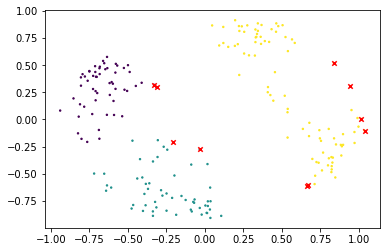

In [16]:
fig = plt.figure()
plt.scatter(X_principal['P1'], X_principal['P2'], 
            c=gm.predict(X_principal),
            s=2)
#plt.scatter(X_principal[:, 0], X_principal[:, 1], c = gm.predict(X_principal))

plt.scatter(anomalies['P1'], anomalies['P2'],
            marker='x',
            s=20,               # marker size
            linewidths=100,      # linewidth of marker edges
            color='red'
            )
plt.show()

In [17]:
bic = []
aic = []
for i in range(8):
    gm = GaussianMixture(
                     n_components = i+1,
                     n_init = 10,
                     max_iter = 100)
    gm.fit(X_principal)
    bic.append(gm.bic(X_principal))
    aic.append(gm.aic(X_principal))

GaussianMixture(n_init=10)

GaussianMixture(n_components=2, n_init=10)

GaussianMixture(n_components=3, n_init=10)

GaussianMixture(n_components=4, n_init=10)

GaussianMixture(n_components=5, n_init=10)

GaussianMixture(n_components=6, n_init=10)

GaussianMixture(n_components=7, n_init=10)

GaussianMixture(n_components=8, n_init=10)

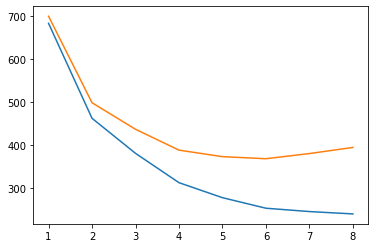

In [18]:
fig = plt.figure()
plt.plot([1,2,3,4,5,6,7,8], aic)
plt.plot([1,2,3,4,5,6,7,8], bic)
plt.show()

(190, 2)

,P1,P2,z
8,0.662847,-0.611449,anomalous
10,0.673839,-0.602215,anomalous
77,0.945413,0.306842,anomalous
81,0.838206,0.518701,anomalous
92,1.015922,0.005237,anomalous


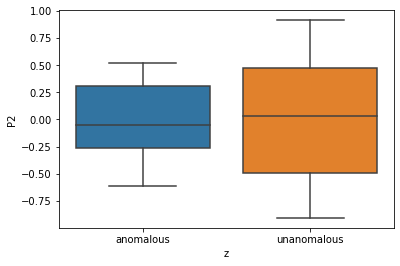

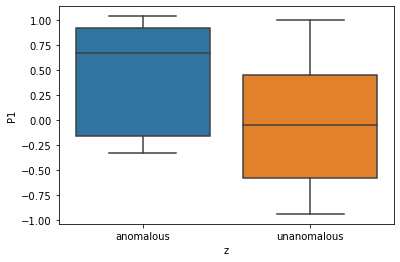

In [19]:
unanomalies = X_principal[densities >= density_threshold]
unanomalies.shape    # (1200, 2)
# 7.2 Transform both anomalous and unanomalous data
#     to pandas DataFrame
df_anomalies = pd.DataFrame(anomalies, columns = ['P1', 'P2'])
df_anomalies['z'] = 'anomalous'   # Create a IIIrd constant column
df_normal = pd.DataFrame(unanomalies, columns = ['P1','P2'])
df_normal['z'] = 'unanomalous'    # Create a IIIrd constant column
df = pd.concat([df_anomalies,df_normal])
df.head()

# 7.4.2 Draw featurewise boxplots
sns.boxplot(x = df['z'], y = df['P2'])
#sns.boxplot(x = df['z'], y = df['P1'])
plt.show()
sns.boxplot(x = df['z'], y = df['P1'])

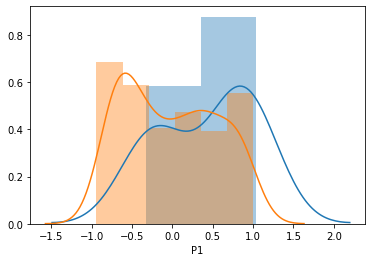

In [20]:
sns.distplot(df_anomalies['P1'])
sns.distplot(df_normal['P1'])